1：$\theta$ 是三⻆视差，其测量服从 $N(1,0.09)$，⽤随机抽样方法给出距离 $d=1/\theta$ 的误差分布

2：求 $\theta$ 的平均值（数学期望），⽅差；$d$ 的数学期望和⽅差

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
from scipy import integrate

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

(0, 5)

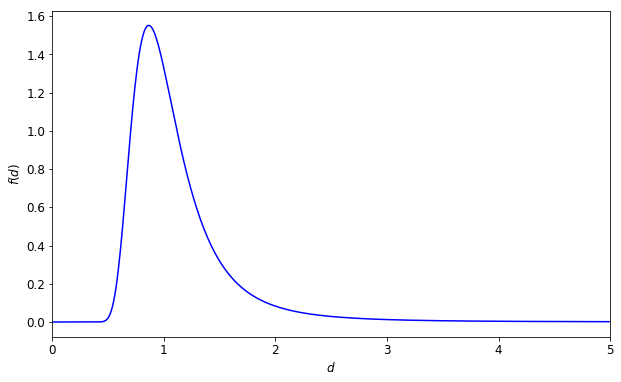

In [2]:
# 画出f(d)图像

def f_d(d):
    return (1/(d**2)) * (10/(3*np.sqrt(2*np.pi))) *  np.exp(-((1/d-1)**2*50)/9)
    
x_ref = np.arange(0.0001, 5, 0.01)
fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(111)
e1, = ax.plot(x_ref, f_d(x_ref), 'b-')
ax.set_xlabel(r'$d$', fontsize=12)
ax.set_ylabel(r'$f(d)$', fontsize=12)
ax.set_xlim(0, 5)
#fig.show()

Acceptance rate: 0.099177717543844
E(d)=1.113 	 D(d)=0.203


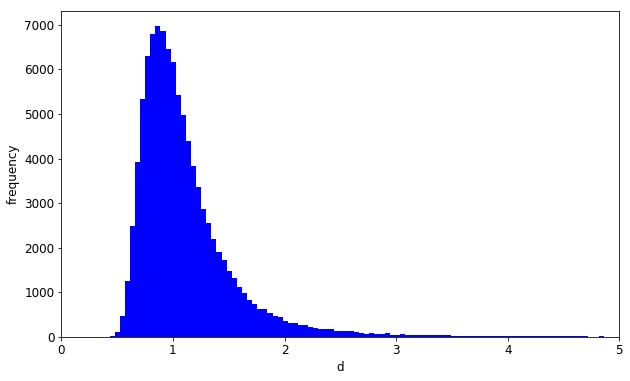

In [3]:
# 使用拒绝抽样得到d的分布

N = 100000
i = 0
k = 0
x = []
while i<N:
    x0 = np.random.uniform(0, 5)
    y0 = np.random.rand()*2
    y1 = f_d(x0)
    if y0 <= y1:
        x.append(x0)
        i += 1
    k += 1

fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(111)
ax.hist(x, bins=100, color='b')
ax.set_xlabel(r'd', fontsize=12)
ax.set_ylabel(r'frequency', fontsize=12)
ax.set_xlim(0, 5)
#fig.show()

print ('Acceptance rate:', N/np.float(k))
print('E(d)=%(m).3f \t D(d)=%(d).3f' %{'m':np.mean(x), 'd':np.var(x)})

In [4]:
'''

采样范围不同时得到不同结果
0-5:   1.112, 0.206
0-10:  1.124, 0.279
0-50:  1.140, 0.538
0-100: 1.141, 0.728
0-150: 1.149, 1.322
0-200: 1.151, 1.941

'''

'\n\n采样范围不同时得到不同结果\n0-5:   1.112, 0.206\n0-10:  1.124, 0.279\n0-50:  1.140, 0.538\n0-100: 1.141, 0.728\n0-150: 1.149, 1.322\n0-200: 1.151, 1.941\n\n'

In [5]:
# 使用scipy计算

def f_d_e(d):
    return (1/d) * (10/(3*np.sqrt(2*np.pi))) *  np.exp(-((1/d-1)**2*50)/9)

E = integrate.quad(f_d_e, 0, 5)[0]
print ('E_0(m)=%(m).3f' %{'m':E})

def f_d_d(d):
    return ((d - E)**2) * (1/(d**2)) * (10/(3*np.sqrt(2*np.pi))) *  np.exp(-((1/d-1)**2*50)/9)

D = integrate.quad(f_d_d, 0, 5)[0]
print ('D_0(d)=%(d).3f' %{'d':D})

E_0(m)=1.109
D_0(d)=0.206


E(theta)=0.999 	 D(theta)=0.090


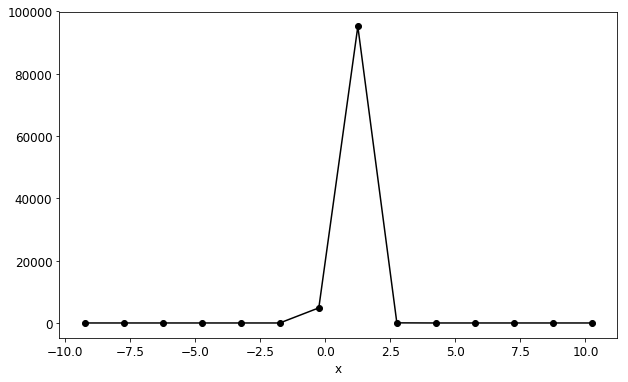

In [6]:
# 使用随机抽样求theta的分布

mu = 1.0
sigma2 = 0.09
sigma = np.sqrt(sigma2)
x1 = np.random.normal(loc=mu, scale=sigma, size=100000)

xgrid = np.arange(-10,12,1.5)
xcenter = (xgrid[1:]+xgrid[:-1])/2
hx, xedge = np.histogram(x1, xgrid)

fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(111)
e1, = ax.plot(xcenter, hx, 'ko-')
ax.set_xlabel('x', fontsize=12)
#fig.show()

print('E(theta)=%(m).3f \t D(theta)=%(d).3f' %{'m':np.mean(x1), 'd':np.var(x1)})

E_1(d)=1.166 	 D_1(d)=8.913


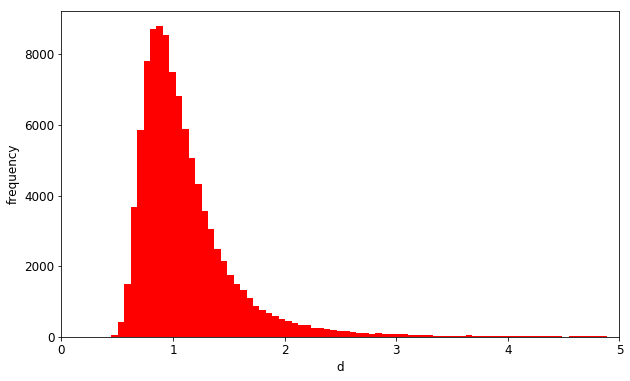

In [7]:
# 尝试直接使用theta抽样值得到d的分布

x1 = x1[x1>0]
d1 = 1/x1

fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(111)
ax.hist(d1, bins=10000, color='r')
ax.set_xlabel(r'd', fontsize=12)
ax.set_ylabel(r'frequency', fontsize=12)
ax.set_xlim(0, 5)
#fig.show()

print('E_1(d)=%(m).3f \t D_1(d)=%(d).3f' %{'m':np.mean(d1), 'd':np.var(d1)})